# Data Wrangling the 'WeRateDogs' twitter archive

## Part 1 Data Wrangling

In [21]:
%matplotlib inline

import os
import requests
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Gather
Download image_predictions.tsv file hosted on Udacity's servers programmatically using the Requests library and read it into a pandas dataframe.

In [22]:
#1. make request and get content
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#2. create folder
folder_name = 'image-predict'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
#3. write content from url to a file in the folder above
with open(os.path.join(folder_name,url.split("/")[-1]),"wb") as file:
    file.write(response.content)

print os.path.join(folder_name,url.split("/")[-1])

image-predict/image-predictions.tsv


In [23]:
img_pred = pd.read_csv("image-predict/image-predictions.tsv", sep = "\t")
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Download twitter_archive_enhanced.csv file manually and read into a pandas dataframe. 

In [24]:
twitter_archive_enh = pd.read_csv("twitter-archive-enhanced.csv")
tweet_ids = twitter_archive_enh['tweet_id']
tweet_ids.head()
print len(tweet_ids)

2356


In order to authorise our app to access Twitter on our behalf, we need to use the OAuth interface (using tweepy).

In [44]:
consumer_key = '-'
consumer_secret = '-'
access_token = '-'
access_secret = '-'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line.

In [45]:
def get_tweet_json(ids):
    #This function gets the json associated with each tweet using the tweet_id
    
    start = timer() #starting timer to calculate execution time 
    data = []
    count = 0
    
    for i in ids:
        try:
            tweet = api.get_status(i, tweet_mode='extended')
            data.append(tweet._json)
            print "Tweet ID %d found\n" %(i)
            count = count + 1
            
        except:
            print 'Tweet ID %d NOT found!!' %(i)
    
    if data: #if list is not empty
        with open('tweet_json.txt', 'a') as outfile:
            for item in data:
                json.dump(item, outfile)
                outfile.write('\n')  
        
    end = timer() #stop timer
    print '%d Tweets processed ' %count
    print "Total time "
    print (end - start)  
    return None

get_tweet_json(tweet_ids)



Tweet ID 892420643555336193 found

Tweet ID 892177421306343426 found

Tweet ID 891815181378084864 found

Tweet ID 891689557279858688 found

Tweet ID 891327558926688256 found

Tweet ID 891087950875897856 found

Tweet ID 890971913173991426 found

Tweet ID 890729181411237888 found

Tweet ID 890609185150312448 found

Tweet ID 890240255349198849 found

Tweet ID 890006608113172480 found

Tweet ID 889880896479866881 found

Tweet ID 889665388333682689 found

Tweet ID 889638837579907072 found

Tweet ID 889531135344209921 found

Tweet ID 889278841981685760 found

Tweet ID 888917238123831296 found

Tweet ID 888804989199671297 found

Tweet ID 888554962724278272 found

Tweet ID 888202515573088257 NOT found!!
Tweet ID 888078434458587136 found

Tweet ID 887705289381826560 found

Tweet ID 887517139158093824 found

Tweet ID 887473957103951883 found

Tweet ID 887343217045368832 found

Tweet ID 887101392804085760 found

Tweet ID 886983233522544640 found

Tweet ID 886736880519319552 found

Tweet ID 886680

Tweet ID 847606175596138505 found

Tweet ID 847251039262605312 found

Tweet ID 847157206088847362 found

Tweet ID 847116187444137987 found

Tweet ID 846874817362120707 found

Tweet ID 846514051647705089 found

Tweet ID 846505985330044928 found

Tweet ID 846153765933735936 found

Tweet ID 846139713627017216 found

Tweet ID 846042936437604353 found

Tweet ID 845812042753855489 found

Tweet ID 845677943972139009 found

Tweet ID 845459076796616705 found

Tweet ID 845397057150107648 found

Tweet ID 845306882940190720 found

Tweet ID 845098359547420673 found

Tweet ID 844979544864018432 found

Tweet ID 844973813909606400 found

Tweet ID 844704788403113984 found

Tweet ID 844580511645339650 found

Tweet ID 844223788422217728 found

Tweet ID 843981021012017153 found

Tweet ID 843856843873095681 found

Tweet ID 843604394117681152 found

Tweet ID 843235543001513987 found

Tweet ID 842892208864923648 NOT found!!
Tweet ID 842846295480000512 found

Tweet ID 842765311967449089 found

Tweet ID 842535

Tweet ID 816816676327063552 found

Tweet ID 816697700272001025 found

Tweet ID 816450570814898180 found

Tweet ID 816336735214911488 found

Tweet ID 816091915477250048 found

Tweet ID 816062466425819140 found

Tweet ID 816014286006976512 found

Tweet ID 815990720817401858 found

Tweet ID 815966073409433600 found

Tweet ID 815745968457060357 found

Tweet ID 815736392542261248 found

Tweet ID 815639385530101762 found

Tweet ID 815390420867969024 found

Tweet ID 814986499976527872 found

Tweet ID 814638523311648768 found

Tweet ID 814578408554463233 found

Tweet ID 814530161257443328 found

Tweet ID 814153002265309185 found

Tweet ID 813944609378369540 found

Tweet ID 813910438903693312 found

Tweet ID 813812741911748608 found

Tweet ID 813800681631023104 found

Tweet ID 813217897535406080 found

Tweet ID 813202720496779264 found

Tweet ID 813187593374461952 found

Tweet ID 813172488309972993 found

Tweet ID 813157409116065792 found

Tweet ID 813142292504645637 found

Tweet ID 81313036668

Tweet ID 785872687017132033 found

Tweet ID 785639753186217984 found

Tweet ID 785533386513321988 found

Tweet ID 785515384317313025 found

Tweet ID 785264754247995392 found

Tweet ID 785170936622350336 found

Tweet ID 784826020293709826 found

Tweet ID 784517518371221505 found

Tweet ID 784431430411685888 found

Tweet ID 784183165795655680 found

Tweet ID 784057939640352768 found

Tweet ID 783839966405230592 found

Tweet ID 783821107061198850 found

Tweet ID 783695101801398276 found

Tweet ID 783466772167098368 found

Tweet ID 783391753726550016 found

Tweet ID 783347506784731136 found

Tweet ID 783334639985389568 found

Tweet ID 783085703974514689 found

Tweet ID 782969140009107456 found

Tweet ID 782747134529531904 found

Tweet ID 782722598790725632 found

Tweet ID 782598640137187329 found

Tweet ID 782305867769217024 found

Tweet ID 782021823840026624 found

Tweet ID 781955203444699136 found

Tweet ID 781661882474196992 found

Tweet ID 781655249211752448 found

Tweet ID 78152469339

Tweet ID 753294487569522689 found

Tweet ID 753039830821511168 found

Tweet ID 753026973505581056 found

Tweet ID 752932432744185856 found

Tweet ID 752917284578922496 found

Tweet ID 752701944171524096 found

Tweet ID 752682090207055872 found

Tweet ID 752660715232722944 found

Tweet ID 752568224206688256 found

Tweet ID 752519690950500352 found

Tweet ID 752334515931054080 found

Tweet ID 752309394570878976 found

Tweet ID 752173152931807232 found

Tweet ID 751950017322246144 found

Tweet ID 751937170840121344 found

Tweet ID 751830394383790080 found

Tweet ID 751793661361422336 found

Tweet ID 751598357617971201 found

Tweet ID 751583847268179968 found

Tweet ID 751538714308972544 found

Tweet ID 751456908746354688 found

Tweet ID 751251247299190784 found

Tweet ID 751205363882532864 found

Tweet ID 751132876104687617 found

Tweet ID 750868782890057730 found

Tweet ID 750719632563142656 found

Tweet ID 750506206503038976 found

Tweet ID 750429297815552001 found

Tweet ID 75038341106

Tweet ID 720059472081784833 found

Tweet ID 720043174954147842 found

Tweet ID 719991154352222208 found

Tweet ID 719704490224398336 found

Tweet ID 719551379208073216 found

Tweet ID 719367763014393856 found

Tweet ID 719339463458033665 found

Tweet ID 719332531645071360 found

Tweet ID 718971898235854848 found

Tweet ID 718939241951195136 found

Tweet ID 718631497683582976 found

Tweet ID 718613305783398402 found

Tweet ID 718540630683709445 found

Tweet ID 718460005985447936 found

Tweet ID 718454725339934721 found

Tweet ID 718246886998687744 found

Tweet ID 718234618122661888 found

Tweet ID 717841801130979328 found

Tweet ID 717790033953034240 found

Tweet ID 717537687239008257 found

Tweet ID 717428917016076293 found

Tweet ID 717421804990701568 found

Tweet ID 717047459982213120 found

Tweet ID 717009362452090881 found

Tweet ID 716802964044845056 found

Tweet ID 716791146589110272 found

Tweet ID 716730379797970944 found

Tweet ID 716447146686459905 found

Tweet ID 71643911818


Tweet ID 699036661657767936 found

Tweet ID 698989035503689728 found

Tweet ID 698953797952008193 found

Tweet ID 698907974262222848 found

Tweet ID 698710712454139905 found

Tweet ID 698703483621523456 found

Tweet ID 698635131305795584 found

Tweet ID 698549713696649216 found

Tweet ID 698355670425473025 found

Tweet ID 698342080612007937 found

Tweet ID 698262614669991936 found

Tweet ID 698195409219559425 found

Tweet ID 698178924120031232 found

Tweet ID 697995514407682048 found

Tweet ID 697990423684476929 found

Tweet ID 697943111201378304 found

Tweet ID 697881462549430272 found

Tweet ID 697630435728322560 found

Tweet ID 697616773278015490 found

Tweet ID 697596423848730625 found

Tweet ID 697575480820686848 found

Tweet ID 697516214579523584 found

Tweet ID 697482927769255936 found

Tweet ID 697463031882764288 found

Tweet ID 697270446429966336 found

Tweet ID 697259378236399616 found

Tweet ID 697255105972801536 found

Tweet ID 697242256848379904 found

Tweet ID 6969002046

Tweet ID 683834909291606017 found

Tweet ID 683828599284170753 found

Tweet ID 683773439333797890 found

Tweet ID 683742671509258241 found

Tweet ID 683515932363329536 found

Tweet ID 683498322573824003 found

Tweet ID 683481228088049664 found

Tweet ID 683462770029932544 found

Tweet ID 683449695444799489 found

Tweet ID 683391852557561860 found

Tweet ID 683357973142474752 found

Tweet ID 683142553609318400 found

Tweet ID 683111407806746624 found

Tweet ID 683098815881154561 found

Tweet ID 683078886620553216 found

Tweet ID 683030066213818368 found

Tweet ID 682962037429899265 found

Tweet ID 682808988178739200 found

Tweet ID 682788441537560576 found

Tweet ID 682750546109968385 found

Tweet ID 682697186228989953 found

Tweet ID 682662431982772225 found

Tweet ID 682638830361513985 found

Tweet ID 682429480204398592 found

Tweet ID 682406705142087680 found

Tweet ID 682393905736888321 found

Tweet ID 682389078323662849 found

Tweet ID 682303737705140231 found

Tweet ID 68225952404

Tweet ID 675006312288268288 found

Tweet ID 675003128568291329 found

Tweet ID 674999807681908736 found

Tweet ID 674805413498527744 found

Tweet ID 674800520222154752 found

Tweet ID 674793399141146624 found

Tweet ID 674790488185167872 found

Tweet ID 674788554665512960 found

Tweet ID 674781762103414784 found

Tweet ID 674774481756377088 found

Tweet ID 674767892831932416 found

Tweet ID 674764817387900928 found

Tweet ID 674754018082705410 found

Tweet ID 674752233200820224 found

Tweet ID 674743008475090944 found

Tweet ID 674742531037511680 found

Tweet ID 674739953134403584 found

Tweet ID 674737130913071104 found

Tweet ID 674690135443775488 found

Tweet ID 674670581682434048 found

Tweet ID 674664755118911488 found

Tweet ID 674646392044941312 found

Tweet ID 674644256330530816 found

Tweet ID 674638615994089473 found

Tweet ID 674632714662858753 found

Tweet ID 674606911342424069 found

Tweet ID 674468880899788800 found

Tweet ID 674447403907457024 found

Tweet ID 67443690157


Tweet ID 670428280563085312 found

Tweet ID 670427002554466305 found

Tweet ID 670421925039075328 found

Tweet ID 670420569653809152 found

Tweet ID 670417414769758208 found

Tweet ID 670411370698022913 found

Tweet ID 670408998013820928 found

Tweet ID 670403879788544000 found

Tweet ID 670385711116361728 found

Tweet ID 670374371102445568 found

Tweet ID 670361874861563904 found

Tweet ID 670338931251150849 found

Tweet ID 670319130621435904 found

Tweet ID 670303360680108032 found

Tweet ID 670290420111441920 found

Tweet ID 670093938074779648 found

Tweet ID 670086499208155136 found

Tweet ID 670079681849372674 found

Tweet ID 670073503555706880 found

Tweet ID 670069087419133954 found

Tweet ID 670061506722140161 found

Tweet ID 670055038660800512 found

Tweet ID 670046952931721218 found

Tweet ID 670040295598354432 found

Tweet ID 670037189829525505 found

Tweet ID 670003130994700288 found

Tweet ID 669993076832759809 found

Tweet ID 669972011175813120 found

Tweet ID 6699700426

Tweet ID 666050758794694657 found

Tweet ID 666049248165822465 found

Tweet ID 666044226329800704 found

Tweet ID 666033412701032449 found

Tweet ID 666029285002620928 found

Tweet ID 666020888022790149 found

2350 Tweets processed 
Total time 
1958.89045095


Read this tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [182]:
with open('tweet_json.txt') as f:
    df_json = pd.DataFrame(json.loads(line) for line in f)


In [183]:
list(df_json)


[u'contributors',
 u'coordinates',
 u'created_at',
 u'display_text_range',
 u'entities',
 u'extended_entities',
 u'favorite_count',
 u'favorited',
 u'full_text',
 u'geo',
 u'id',
 u'id_str',
 u'in_reply_to_screen_name',
 u'in_reply_to_status_id',
 u'in_reply_to_status_id_str',
 u'in_reply_to_user_id',
 u'in_reply_to_user_id_str',
 u'is_quote_status',
 u'lang',
 u'place',
 u'possibly_sensitive',
 u'possibly_sensitive_appealable',
 u'quoted_status',
 u'quoted_status_id',
 u'quoted_status_id_str',
 u'retweet_count',
 u'retweeted',
 u'retweeted_status',
 u'source',
 u'truncated',
 u'user']

In [170]:
df_json.sample(30)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1676,None,None,Wed Dec 30 02:54:35 +0000 2015,"[0, 93]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,7178,False,This is Ulysses. He likes holding hands and hi...,None,...,False,NaN,NaN,NaN,2273,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
1351,None,None,Sat Feb 27 17:24:05 +0000 2016,"[0, 135]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,2830,False,This is Bella. Based on this picture she's at ...,None,...,False,NaN,NaN,NaN,765,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
1322,None,None,Sat Mar 05 17:16:20 +0000 2016,"[0, 133]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,5587,False,This is Dexter. He's a shy pup. Doesn't bark m...,None,...,False,NaN,NaN,NaN,1804,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
1285,None,None,Fri Mar 11 17:50:48 +0000 2016,"[0, 107]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,2542,False,This is River. He's changing the trumpet game....,None,...,False,NaN,NaN,NaN,827,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
1320,None,None,Sat Mar 05 23:51:49 +0000 2016,"[0, 139]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,2956,False,This is Kara. She's been trying to solve that ...,None,...,False,NaN,NaN,NaN,1021,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
136,None,None,Mon May 22 00:28:40 +0000 2017,"[0, 106]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,106242,False,This is Jamesy. He gives a kiss to every other...,None,...,False,NaN,NaN,NaN,32589,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
1388,None,None,Thu Feb 18 02:24:13 +0000 2016,"[0, 140]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,8222,False,When it's Janet from accounting's birthday but...,None,...,False,NaN,NaN,NaN,3092,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
1488,None,None,Fri Jan 29 02:17:12 +0000 2016,"[0, 139]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,2499,False,Meet Tupawc. He's actually a Christian rapper....,None,...,False,NaN,NaN,NaN,905,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
1004,None,None,Tue Jun 28 01:21:27 +0000 2016,"[0, 104]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,2530,False,This is Bookstore and Seaweed. Bookstore is ti...,None,...,False,NaN,NaN,NaN,613,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
45,None,None,Sun Jul 09 21:29:42 +0000 2017,"[0, 140]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,20675,False,Meet Yogi. He doesn't have any important dog m...,None,...,False,NaN,NaN,NaN,3086,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extend

In [213]:
len(df_json)

2353

As we want only original tweets and not the retweets, let us look if retweeted_status column is null. If null, keep that row else if df_json.retweeted_status is null then drop that row.

In [214]:
df_json = df_json.drop(df_json[pd.notnull(df_json.retweeted_status)].index)
len(df_json) 

2178

175 rows were dropped as they were retweets and not original tweets.

In [215]:
df_tweets = df_json.loc[:, ['id','retweet_count','favorite_count','full_text']]
df_tweets.columns = ['tweet_id','retweet_count','favorite_count','description']
print df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2178 entries, 0 to 2352
Data columns (total 4 columns):
tweet_id          2178 non-null int64
retweet_count     2178 non-null int64
favorite_count    2178 non-null int64
description       2178 non-null object
dtypes: int64(3), object(1)
memory usage: 85.1+ KB
None


In [216]:
twitter_archive_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Let's merge the dataframes 'img_pred', 'df_tweets' and 'twitter_archive_enh' to form a master dataframe 'twitter_archive_master'.

In [217]:
twitter_archive_master = pd.merge(pd.merge(twitter_archive_enh, df_tweets, on='tweet_id',how='inner'), img_pred, on = 'tweet_id',how ='inner')                            


### Assess

In [218]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 31 columns):
tweet_id                      1997 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1997 non-null object
source                        1997 non-null object
text                          1997 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1997 non-null object
rating_numerator              1997 non-null int64
rating_denominator            1997 non-null int64
name                          1997 non-null object
doggo                         1997 non-null object
floofer                       1997 non-null object
pupper                        1997 non-null object
puppo                         1997 non-null object
retweet_count                 1997 non

In [219]:
twitter_archive_master.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
571,775085132600442880,NaN,NaN,2016-09-11 21:34:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He would like a hug. 13/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775085132...,...,1,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,True
495,788908386943430656,NaN,NaN,2016-10-20 01:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Lucy. She destroyed not one, but two r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/788908386...,...,1,remote_control,0.881538,False,oscilloscope,0.035513,False,golden_retriever,0.034090,True
321,821407182352777218,NaN,NaN,2017-01-17 17:21:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sundance. He's a doggo drummer. Even s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821407182...,...,1,Irish_setter,0.505496,True,vizsla,0.168747,True,Chesapeake_Bay_retriever,0.111311,True
682,756275833623502848,NaN,NaN,2016-07-21 23:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When ur older siblings get to play in the deep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756275833...,...,1,Airedale,0.602957,True,Irish_terrier,0.086981,True,bloodhound,0.086276,True
614,767500508068192258,NaN,NaN,2016-08-21 23:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louie. He's making quite a h*ckin mess...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/767500508...,...,1,chow,0.483228,True,golden_retriever,0.165063,True,Norfolk_terrier,0.060173,True
81,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,...,2,Cardigan,0.806674,True,Pembroke,0.116622,True,kelpie,0.049182,True
193,845397057150107648,NaN,NaN,2017-03-24 22:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,NaN,NaN,NaN,"https://www.gofundme.com/help-save-a-pup,https...",...,1,Dandie_Dinmont,0.394404,True,Maltese_dog,0.186537,True,West_Highland_white_terrier,0.181985,True
433,800141422401830912,NaN,NaN,2016-11-20 00:59:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Peaches. She's the ultimate selfie sid...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800141422...,...,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
886,724405726123311104,NaN,NaN,2016-04-25 01:12:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ashleigh. She's having Coachella withd...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724405726...,...,1,golden_retriever,0.240695,True,cocker_spaniel,0.202444,True,feather_boa,0.159348,False
358,815639385530101762,NaN,NaN,2017-01-01 19:22:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. His nose is quite chilly. Reque...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815639385...,...,1,German_shepherd,0.817953,True,Norwegian_elkhound,0.140007,True,malinois,0.024821,True


# Assessment Summary
## Quality issues

1. Name for tweet with ID = 778039087836069888 should be 'Max'.
    
2. Record with Tweet_id = 887517139158093824 has incorrect name = 'such'. 

3. Record with Tweet_id = 887473957103951883 has name = NaN instead of 'Canela'.

4. Many rows have incorrectly extracted names such as 'a','the','an'.

5. Some rows have rating_denominator != 10.

6. The same rows above have incorrect numerators too.

7. Record with Tweet_id = 828011680017821696 actually has two dogs Brutus and Jersey. Need to capture info for both and distinguish the two.

8. Record with Tweet_id = 678396796259975168 actually has two dogs (names not provided). Need to capture info for both and distinguish the two.

9. Record with tweet_id = 825147591692263424, has name 'sweet pea' and not just 'sweet'.

10. Utility used to post the tweet is embedded within the url in source column. Need to extract it. 

11. Most missing values are indicated by 'None' string instead of np.NaN

11. Datatypes for following columns are incorrect:
    - tweet_id is int instead of string
    - in_reply_to_status_id, in_reply_to_user_id must string
    - timestamp, retweeted_status_timestamp should be datetime
    - retweeted_status_id, retweeted_status_user_id must be string

    
## Tidiness issues
1. The dog stages 4 columns should actually be just one column 'dog_stage' with options viz. pupper,puppo,doggo,floofer with datatype category

2. The expanded_urls column has same url listed once/twice/thrice depending on number of images uploaded. 


### Clean

In order to clean the dataset let's first create a copy of the dataset and check if it has been populated as expected.

In [243]:
twitter_arc_master_clean = twitter_archive_master.copy()


In [245]:
t = twitter_arc_master_clean.sample(500)
t.to_csv('check.csv', encoding = 'utf-8')

In [246]:
twitter_arc_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 31 columns):
tweet_id                      1997 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1997 non-null object
source                        1997 non-null object
text                          1997 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1997 non-null object
rating_numerator              1997 non-null int64
rating_denominator            1997 non-null int64
name                          1997 non-null object
doggo                         1997 non-null object
floofer                       1997 non-null object
pupper                        1997 non-null object
puppo                         1997 non-null object
retweet_count                 1997 non

#### Addressing tidiness issue 1
The dog stages 4 columns should actually be just one column 'dog_stage' with 4 options viz. pupper, puppo, doggo, floofer with datatype 'category'

##### Definition
Create new column 'dog_stage' values in columns pupper,puppo,doggo,floofer. 
Then drop the old columns (pupper,puppo,doggo,floofer).

##### Code

In [247]:

def merge_dogstage(df):
    for index, row in df.iterrows():
        stage_list =[]
        stage_list.append([row['doggo'],row['floofer'],row['pupper'],row['puppo']]) 

        for lst in stage_list:
            for stage in lst:
                if stage not in ['None']:
                # this is because iterrows does not provide access to original dataframe but we do have original index!!
                    df.loc[index,'dog_stage'] = stage 
    #deleting old columns
    #print list(df)
    #    patients_clean = patients_clean.drop('contact', axis=1)
    df = df.drop(['pupper','puppo','doggo','floofer'], axis = 1, inplace=True)
    #print list(df)
    print 'Dogstage column created successfully'
    return None

merge_dogstage(twitter_arc_master_clean)
twitter_arc_master_clean.dog_stage = twitter_arc_master_clean.dog_stage.astype('category')


Dogstage column created successfully


##### Test

In [248]:
print list(twitter_arc_master_clean)
twitter_arc_master_clean.dog_stage.unique()

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'retweet_count', 'favorite_count', 'description', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage']


[NaN, doggo, puppo, pupper, floofer]
Categories (4, object): [doggo, puppo, pupper, floofer]

#### Addressing tidiness issue #2
The expanded_urls column has same url listed once/twice/thrice depending on number of images uploaded. 

##### Definition
List only one value of the url and make a new column 'count_media' to indicate number of media (photos/vine videos) uploaded for the tweet

Below I am collecting sample test data for testing the code snippet below.


In [249]:
#tweet with id = 807106840509214720 has one expanded_urls. 
#tweet with id = 708810915978854401 has three expanded_urls. 

print twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 807106840509214720), 'expanded_urls']
print twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 708810915978854401), 'expanded_urls']

403    https://twitter.com/dog_rates/status/807106840...
Name: expanded_urls, dtype: object
996    https://twitter.com/dog_rates/status/708810915...
Name: expanded_urls, dtype: object


##### Code

In [250]:
urls = twitter_arc_master_clean.expanded_urls
urls = list(urls)

for i in range(len(twitter_arc_master_clean)):
    
    if type(urls[i]) == str: #exclude nan entries
        
        urls_list = urls[i].split(',')
        num_media = len(urls_list)
        twitter_arc_master_clean.loc[i,'count_media'] = num_media
        unique_urls_list = list(set(urls_list))
        flag = True
        if num_media > 1: #to get rows with multiple links
            for link in unique_urls_list:
                if 'twitter' in link: #if there is a twitter and a non-twitter link choose the twitter link
                    flag = False
                    twitter_arc_master_clean.loc[i,'expanded_urls'] = link

            if flag:
                #print unique_urls_list
                twitter_arc_master_clean.loc[i,'expanded_urls'] = unique_urls_list[0]

##### Test

In [251]:
#testing expanded_urls to see if it contains only one url.
count = 0
for index, row in twitter_arc_master_clean.iterrows():
    #print row.expanded_urls
    if pd.notnull(row.expanded_urls):
        if (',' in row.expanded_urls):
            count = count + 1
            print 'Tweet %d has incorrect expanded_urls %s' %(row.tweet_id, row.expanded_urls)
if count == 0:
    print 'All urls in expanded_urls column are correct!'
else:
    print '%d rows with urls need to be fixed' %count

#twitter_arc_master_clean.sample(100) 


All urls in expanded_urls column are correct!


In [252]:
#testing to see if 'count_media' column has correct number captured.
#tweet with id = 807106840509214720 has one expanded_urls. Thus count_media should have number 1.
#tweet with id = 708810915978854401 has three expanded_urls. Thus count_media should have number 3.

print twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 807106840509214720), 'count_media']
print twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 708810915978854401), 'count_media']

403    1.0
Name: count_media, dtype: float64
996    3.0
Name: count_media, dtype: float64


#### Addressing quality issue #1:
##### Definition
Add the name 'Max' for tweet with ID = 778039087836069888

##### Code

In [253]:
twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 778039087836069888),'name'] = 'Max'

##### Test

In [254]:
twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 778039087836069888),'name']

555    Max
Name: name, dtype: object

#### Addressing quality issue #2
##### Definition
Add 'Roxy' for name (based on IG tag in text) in record with Tweet_id = 887517139158093824 instead of incorrect name = 'such'

##### Code

In [255]:
twitter_arc_master_clean.loc[(twitter_arc_master_clean['tweet_id']== 887517139158093824),'name'] = 'Roxy'

In [257]:
#test
twitter_arc_master_clean.loc[(twitter_arc_master_clean['tweet_id']== 887517139158093824),'name']


24    Roxy
Name: name, dtype: object

#### Addressing quality issue #3
##### Definition
Update 'Canela' under 'name' column for record with Tweet_id = 887473957103951883 instead of NaN.

##### Code

In [258]:
twitter_arc_master_clean.loc[(twitter_arc_master_clean['tweet_id']== 887473957103951883),'name'] = 'Canela'

In [259]:
#test
twitter_arc_master_clean.loc[(twitter_arc_master_clean['tweet_id']== 887473957103951883),'name']


25    Canela
Name: name, dtype: object

#### Addressing quality issue #4
##### Definition
update name as np.NaN for rows that have incorrectly extracted names included here ['a','the','an','None']

##### Code

In [260]:
for index, row in twitter_arc_master_clean.iterrows():
    if  row['name'] in ['a','the','an','None']:
        #print row['tweet_id'], row['name'], row['description']
        twitter_arc_master_clean.loc[index,'name'] = np.NaN

##### Test

In [263]:
#Records with tweet ids below earlier had following names:
#851591660324737024 None, 881536004380872706 a
print twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 851591660324737024),'name']
print twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 881536004380872706),'name']


167    NaN
Name: name, dtype: object
52    NaN
Name: name, dtype: object


#### Addressing quality issue #5 and 6
##### Definition
Extract correct ratings for numerator and denominator using the description text. Sample correct ratings: 6/10, 11/10, 21/10.

##### Code

In [264]:
for index, row in twitter_arc_master_clean.iterrows():
    denom = row['rating_denominator']
    desc = row['description']
    if pd.notnull(denom) & (denom != 10.0): 
        #print row['rating_numerator'],denom, row['tweet_id']
        regexp = ur'((\d+)/(\d+))'
        result = re.findall(regexp, desc)
        #print result, len(result)
        
        for i in range(len(result)):
            if result[i][-1] in ['10']:    
                twitter_arc_master_clean.loc[index,'rating_numerator'] = float(result[i][-2])
                twitter_arc_master_clean.loc[index,'rating_denominator'] = 10.0
            else:
                twitter_arc_master_clean.loc[index,'rating_numerator'] = np.NaN
                twitter_arc_master_clean.loc[index,'rating_denominator'] = np.NaN


##### Test

In [265]:
count = 0
for index, row in twitter_arc_master_clean.iterrows():
    denom = row['rating_denominator']
    if pd.notnull(denom) & (denom != 10): 
        count = count + 1
        print denom, row['rating_numerator'], row['tweet_id'], row['description']
        
if count==0:
    print 'All denominators are either NaN or 10.0'
else:
    print '%d row(s) has/have denominator that is neither NaN nor 10.' %count

All denominators are either NaN or 10.0


#### Addressing quality issue #7 and 8
##### Definition
#7. Record with Tweet_id = 828011680017821696 actually has two dogs Brutus and Jersey. 
Need to capture info for both and distinguish the two.
#8. Record with Tweet_id = 678396796259975168 actually has two dogs (names not provided). 
Need to capture info for both and distinguish the two.

I DONT know how to resolve this quality issue that is whether I should create an additional row for the second name to keep 1 dog per row but then the tweet_id column would no longer act as a key for the table. 
I also am not sure if should comma separate the two names, as this would violate the rule of one value per cell.


##### Code and Test 
to be added if needed.

#### Addressing quality issue #9

##### Definition
Replace name 'sweet' with 'sweet pea' for record with tweet_id = 825147591692263424

##### Code

In [266]:
twitter_arc_master_clean.loc[(twitter_arc_master_clean['tweet_id']== 825147591692263424), 'name'] = 'sweet pea'

##### Test

In [267]:
twitter_arc_master_clean.loc[(twitter_arc_master_clean['tweet_id']== 825147591692263424), 'name']

301    sweet pea
Name: name, dtype: object

#### Addressing quality issue #10

##### Definition
Replace all missing values indicated by 'None' string (if any) with np.NaN

##### Code

In [268]:
twitter_arc_master_clean.replace({'None': np.NaN},inplace = True)

##### Test

In [272]:
#check if 'None' is present in twitter_arc_master_clean
d = twitter_arc_master_clean.isin(['None']) #returns boolean dataframe 
c = d.drop_duplicates()
if len(c)>1:
    print 'some entries still have ''None' 'value'

#### Addressing quality issue #11

##### Definition
Extract string indicating 'Utility' used to post the tweet. This value is embedded within the url in source column. 
Example: for source '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' we have to extract 'Twitter for iPhone'

##### Code

In [273]:
regex = r'>(.+)<' 

for i, row in twitter_arc_master_clean.iterrows():
    src = row.source
    #print src
    result = re.search(regex, src)
    twitter_arc_master_clean.loc[i,'utility'] = result.group(1)
    

##### Test

In [274]:
print twitter_arc_master_clean.info(), '\n'
#from above result we can see that both source as well utility have 1997 non-null objects

print twitter_arc_master_clean.utility.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 30 columns):
tweet_id                      1997 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1997 non-null object
source                        1997 non-null object
text                          1997 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1997 non-null object
rating_numerator              1984 non-null float64
rating_denominator            1984 non-null float64
name                          1384 non-null object
retweet_count                 1997 non-null int64
favorite_count                1997 non-null int64
description                   1997 non-null object
jpg_url                       1997 non-null object
img_num                       1997 

#### Addressing quality issue #12:
##### Definition
Correct datatypes for following columns:
- tweet_id is int instead of string
- in_reply_to_status_id, in_reply_to_user_id must string
- timestamp, retweeted_status_timestamp should be datetime
- retweeted_status_id, retweeted_status_user_id must be string

##### Code

In [276]:
# To string
twitter_arc_master_clean.tweet_id = twitter_arc_master_clean.tweet_id.astype('str')
twitter_arc_master_clean.in_reply_to_status_id = twitter_arc_master_clean.in_reply_to_status_id.astype('str')
twitter_arc_master_clean.in_reply_to_user_id = twitter_arc_master_clean.in_reply_to_user_id.astype('str')
twitter_arc_master_clean.retweeted_status_id = twitter_arc_master_clean.retweeted_status_id.astype('str')
twitter_arc_master_clean.retweeted_status_user_id = twitter_arc_master_clean.retweeted_status_user_id.astype('str')

# To datetime
twitter_arc_master_clean.timestamp = pd.to_datetime(twitter_arc_master_clean.timestamp)
twitter_arc_master_clean.retweeted_status_timestamp = pd.to_datetime(twitter_arc_master_clean.retweeted_status_timestamp)

# To int
twitter_arc_master_clean.count_media = twitter_arc_master_clean.count_media.astype('int')

##### Test

In [277]:
twitter_arc_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 30 columns):
tweet_id                      1997 non-null object
in_reply_to_status_id         1997 non-null object
in_reply_to_user_id           1997 non-null object
timestamp                     1997 non-null datetime64[ns]
source                        1997 non-null object
text                          1997 non-null object
retweeted_status_id           1997 non-null object
retweeted_status_user_id      1997 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1997 non-null object
rating_numerator              1984 non-null float64
rating_denominator            1984 non-null float64
name                          1384 non-null object
retweet_count                 1997 non-null int64
favorite_count                1997 non-null int64
description                   1997 non-null object
jpg_url                       1997 non-null object
img_num      

#### Final cleaning steps
Dropping the inaccurate text column as the data is present in description column and then renaming 'description' to 'text'


In [278]:
twitter_arc_master_clean = twitter_arc_master_clean.drop('text', axis = 1) 
#test
twitter_arc_master_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,count_media,utility
1640,672614745925664768,nan,nan,2015-12-04 03:13:46,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/672614745...,6.0,...,False,goldfish,0.258865,False,sea_cucumber,0.002015,False,pupper,1,Twitter for iPhone
330,819924195358416896,nan,nan,2017-01-13 15:08:56,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/819924195...,11.0,...,False,shower_curtain,0.091866,False,tub,0.049176,False,doggo,1,Twitter for iPhone
336,819004803107983360,nan,nan,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/819004803...,14.0,...,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True,doggo,4,Twitter for iPhone


Renaming 'description' to 'text' column for familiarity


In [279]:
#code
twitter_arc_master_clean.rename(columns={'description': 'text'}, inplace=True) 
#test
list(twitter_arc_master_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'text',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage',
 'count_media',
 'utility']

Next, lets write the clean dataframe to a csv file. Remember to add index = False to avoid creating an 'Unnamed' column

In [280]:
twitter_arc_master_clean.to_csv('twitter_archive_master.csv', sep=',', encoding='utf-8', index = False)


## Part 2 Analyze Data

Lets analyze the cleaned dataframe 'twitter_arc_master_clean'

In [286]:
full_twitter_df = twitter_arc_master_clean.copy()

Subsetting the dataframe to include only columns needed for further analysis

In [290]:
twitter_df = full_twitter_df.loc[:, [
 'tweet_id','expanded_urls','rating_numerator','rating_denominator','name','retweet_count','favorite_count',
 'text','dog_stage','count_media','utility']]

In [291]:
twitter_df.head()

,tweet_id,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,text,dog_stage,count_media,utility
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8795,39369,This is Phineas. He's a mystical boy. Only eve...,NaN,1,Twitter for iPhone
1,892420643555336193,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8795,39369,This is Phineas. He's a mystical boy. Only eve...,NaN,1,Twitter for iPhone
2,892177421306343426,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6448,33698,This is Tilly. She's just checking pup on you....,NaN,1,Twitter for iPhone
3,892177421306343426,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6448,33698,This is Tilly. She's just checking pup on you....,NaN,1,Twitter for iPhone
4,891815181378084864,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4274,25393,This is Archie. He is a rare Norwegian Pouncin...,NaN,1,Twitter for iPhone


In [292]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 11 columns):
tweet_id              1997 non-null object
expanded_urls         1997 non-null object
rating_numerator      1984 non-null float64
rating_denominator    1984 non-null float64
name                  1384 non-null object
retweet_count         1997 non-null int64
favorite_count        1997 non-null int64
text                  1997 non-null object
dog_stage             306 non-null category
count_media           1997 non-null int64
utility               1997 non-null object
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 173.8+ KB


In [293]:
twitter_df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,count_media
count,1984.000000,1984.0,1997.000000,1997.000000,1997.000000
mean,11.699093,10.0,2768.390586,8948.518277,1.429644
std,40.768892,0.0,4731.550444,12469.489524,0.852135
min,0.000000,10.0,14.000000,81.000000,1.000000
25%,10.000000,10.0,624.000000,1975.000000,1.000000
50%,11.000000,10.0,1352.000000,4114.000000,1.000000
75%,12.000000,10.0,3197.000000,11324.000000,2.000000
max,1776.000000,10.0,78844.000000,131942.000000,5.000000


The max value for rating_numerator is 1776!!!. (After checking we can see that it is correct!)

In [294]:
twitter_df.loc[(twitter_df.rating_numerator == 1776),]

,tweet_id,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,text,dog_stage,count_media,utility
729,749981277374128128,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,2761,5583,This is Atticus. He's quite simply America af....,NaN,1,TweetDeck


## Part 3 Visualize Data

#### Distribution of ratings
First lets split the rating_numerator column into bins and plot the ratings using bar plot

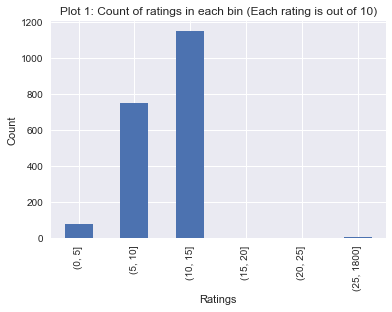

In [295]:
twitter_df['rating_bin'] = pd.cut(twitter_df['rating_numerator'],bins = [0,5,10,15,20,25,1800])

#find the count of ratings in each bin 
grouped_df = twitter_df.groupby('rating_bin')['rating_bin'].count()

grouped_df = grouped_df.plot(kind = 'bar')
grouped_df.set_xlabel("Ratings")
grouped_df.set_ylabel("Count")
grouped_df.set_title('Plot 1: Count of ratings in each bin (Each rating is out of 10)')


As can be seen from the plot #1 above, 
- around 1150 of the users (approx. 57%) rated dogs in range (10,15] i.e. above 10 but less or equal to 15. 
- around 750 users (approx. 37%) rated dogs in the range (5,10]
- around 80 users rated dogs in the range (0,5].
- there is one outlier with rating 1776/10.

#### Analyzing Dog stages

pupper     212
doggo       63
puppo       23
floofer      8
Name: dog_stage, dtype: int64


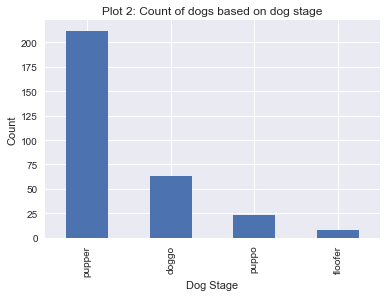

In [297]:
count_stages = twitter_df.dog_stage.value_counts()
print count_stages
stage = count_stages.plot(kind = 'bar')

stage.set_xlabel("Dog Stage")
stage.set_ylabel("Count")
stage.set_title('Plot 2: Count of dogs based on dog stage')

Out of the total 306 tweets that indicate dog_stage:
- around 210 (approx. 68%) have 'pupper' stage 
- around 60 (approx. 20%) have 'doggo' stage
- around 20 (approx. 6%) have 'puppo' stage
- around 10 (approx. 3%) have 'floofer' stage


Analyzing how the favorite_count changes based on dog_stage

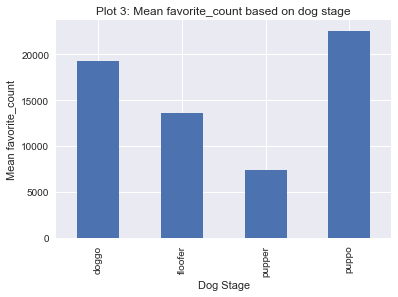

In [298]:
grouped_df = twitter_df.groupby(['dog_stage'])['favorite_count'].mean()

fav = grouped_df.plot(kind="bar")
fav.set_xlabel("Dog Stage")
fav.set_ylabel("Mean favorite_count")
fav.set_title('Plot 3: Mean favorite_count based on dog stage')

Based on plot 3, we see that dogs in 'puppo' stage have highest number of mean favorite_count, followed by 'doggo', then 'floofer' and 'pupper'.
